# Project Deliverable - 1  
**Subject:** Advanced Big Data and Data Mining (MSCS 634)  
**Student Name:** Chandra Kiran Billingi


In [71]:
# importing the necessary libraries to work on the data set
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [72]:
# Loading dataset into pandas library for preprocessing
df = pd.read_csv('cardekho.csv')

# Preview data
df.head()


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


                                  Exploring the Data

In [73]:
#shape of the data set
df.shape

(8128, 12)

In [74]:
#columns in the data set
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage(km/ltr/kg)', 'engine', 'max_power',
       'seats'],
      dtype='object')

In [75]:
#columns in the data set with their types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


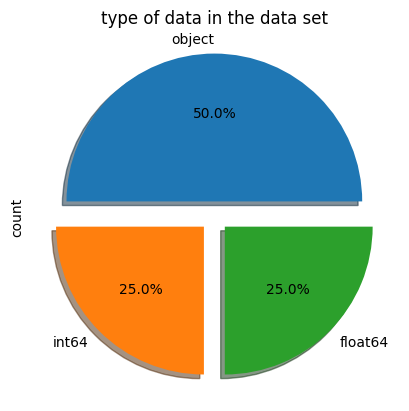

In [76]:
#pie chart of the data set with the types of data set
df.dtypes.value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.1f%%',shadow=True)
plt.title('type of data in the data set');

In [77]:
#The description of the data set
df.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
count,8128,8128.000000,8.128000e+03,8.128000e+03,8128,8128,8128,8128,7907.000000,7907.000000,7913,7907.000000
unique,2058,NaN,NaN,NaN,4,3,2,5,NaN,NaN,320,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,NaN,NaN,74,NaN
freq,129,NaN,NaN,NaN,4402,6766,7078,5289,NaN,NaN,377,NaN
mean,NaN,2013.804011,6.382718e+05,6.981951e+04,NaN,NaN,NaN,NaN,19.418783,1458.625016,NaN,5.416719
std,NaN,4.044249,8.062534e+05,5.655055e+04,NaN,NaN,NaN,NaN,4.037145,503.916303,NaN,0.959588
min,NaN,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,0.000000,624.000000,NaN,2.000000
25%,NaN,2011.000000,2.549990e+05,3.500000e+04,NaN,NaN,NaN,NaN,16.780000,1197.000000,NaN,5.000000
50%,NaN,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,19.300000,1248.000000,NaN,5.000000
75%,NaN,2017.000000,6.750000e+05,9.800000e+04,NaN,NaN,NaN,NaN,22.320000,1582.000000,NaN,5.000000


                                            Data Cleaning

In [78]:
#printing all the missing values in the data set and the number of rows tat were missing
df.isnull().sum()


,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage(km/ltr/kg),221
engine,221


In [79]:
# percentage of the missing values
df.isnull().sum()/len(df)*100

,0
name,0.000000
year,0.000000
selling_price,0.000000
km_driven,0.000000
fuel,0.000000
seller_type,0.000000
transmission,0.000000
owner,0.000000
mileage(km/ltr/kg),2.718996
engine,2.718996


so we can see that 2.71 % of the mileage,engine and the seats data are missing and the 2.71% of the max_power

In [80]:
# Handline Missing Mileage values

df['mileage(km/ltr/kg)'].describe()

,mileage(km/ltr/kg)
count,7907.000000
mean,19.418783
std,4.037145
min,0.000000
25%,16.780000
50%,19.300000
75%,22.320000
max,42.000000


In [81]:
# replacing the empty values with mean
df['mileage(km/ltr/kg)'] = df['mileage(km/ltr/kg)'].fillna(df['mileage(km/ltr/kg)'].mean())


In [82]:
df.engine.describe()

,engine
count,7907.000000
mean,1458.625016
std,503.916303
min,624.000000
25%,1197.000000
50%,1248.000000
75%,1582.000000
max,3604.000000


In [83]:
# replacing the empty values with mean
df.engine= df.engine.fillna(df.engine.mean())


In [84]:
df.seats.describe()

,seats
count,7907.000000
mean,5.416719
std,0.959588
min,2.000000
25%,5.000000
50%,5.000000
75%,5.000000
max,14.000000


In [85]:
# replacing the empty values with max
df.seats= df.seats.fillna(df.seats.max())


In [86]:
df.max_power.describe()

,max_power
count,7913
unique,320
top,74
freq,377


In [87]:
# replacing the empty values with mode
df['max_power'] = df['max_power'].fillna(df['max_power'].mode()[0])

                                      Verification

In [88]:
df.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage(km/ltr/kg),0
engine,0


From the above we can see that there are no missing values in the data

                                      Removing Duplicate Rows

In [89]:
# Count the number of duplicate Rows
print("Number of duplicate rows:", df.duplicated().sum())

# Remove all the duplicates
df = df.drop_duplicates()


Number of duplicate rows: 1202


                          Outlier Detection and Removal using IQR

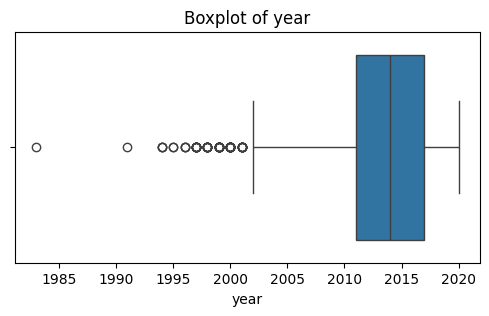

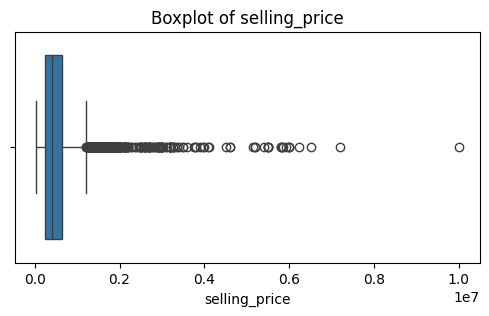

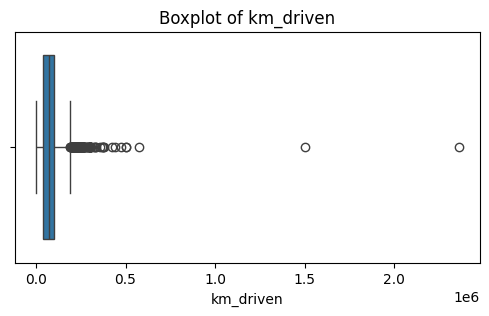

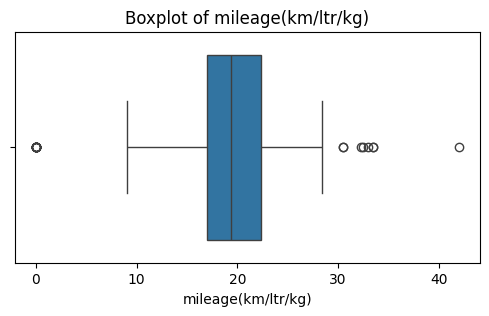

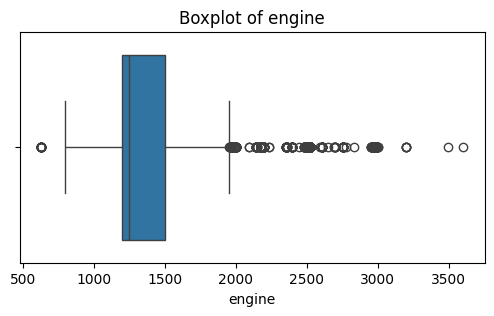

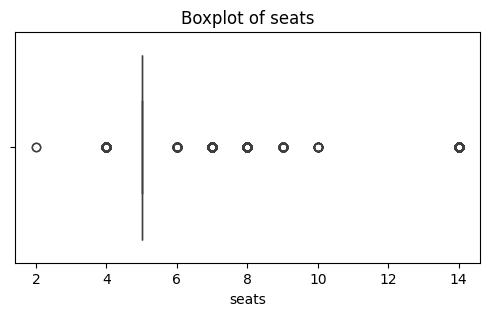

In [90]:
#Box Plots of the data set
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplots for all numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


In [91]:
#function for the removal of IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    before = df.shape[0]
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    after = df_filtered.shape[0]
    print(f"{column}: Removed {before - after} outliers")
    return df_filtered


In [92]:
# Create a copy before outlier treatment
df_cleaned = df.copy()

# List of columns with outliers
columns_with_outliers = ['year', 'selling_price', 'km_driven', 'mileage(km/ltr/kg)', 'engine', 'seats']

# Remove outliers one by one
for col in columns_with_outliers:
    df_cleaned = remove_outliers_iqr(df_cleaned, col)


year: Removed 77 outliers
selling_price: Removed 323 outliers
km_driven: Removed 163 outliers
mileage(km/ltr/kg): Removed 21 outliers
engine: Removed 833 outliers
seats: Removed 623 outliers


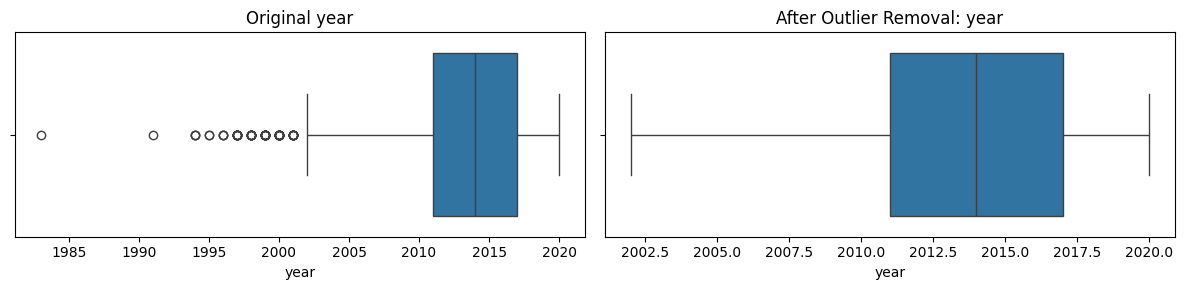

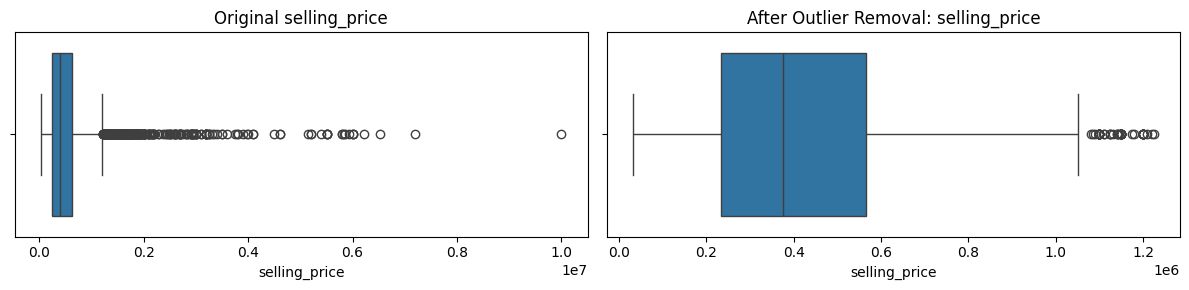

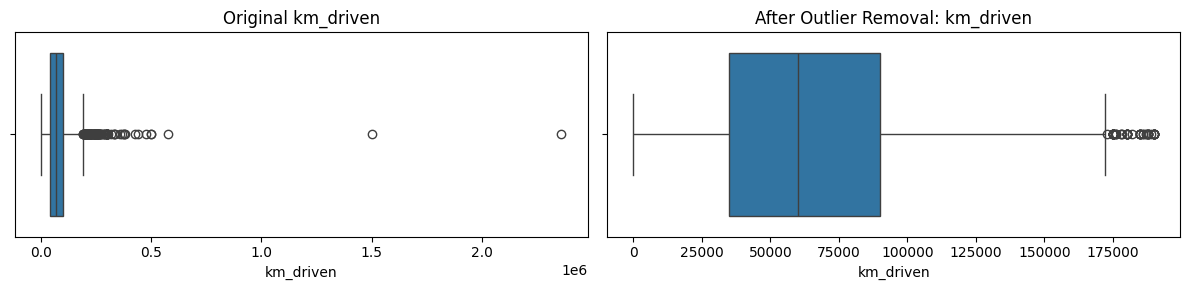

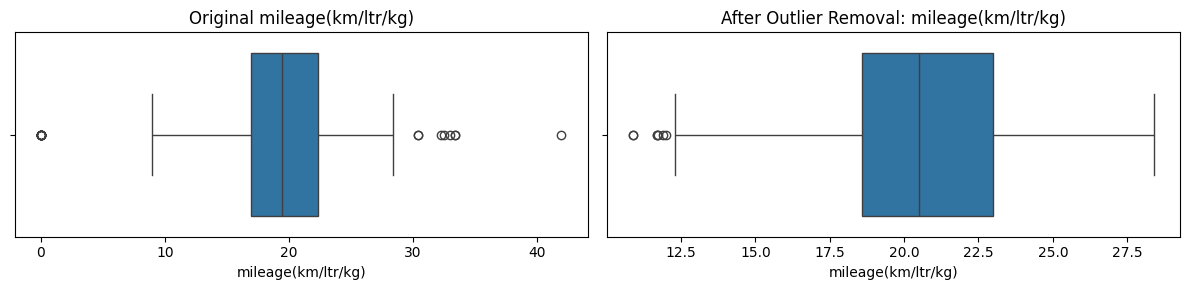

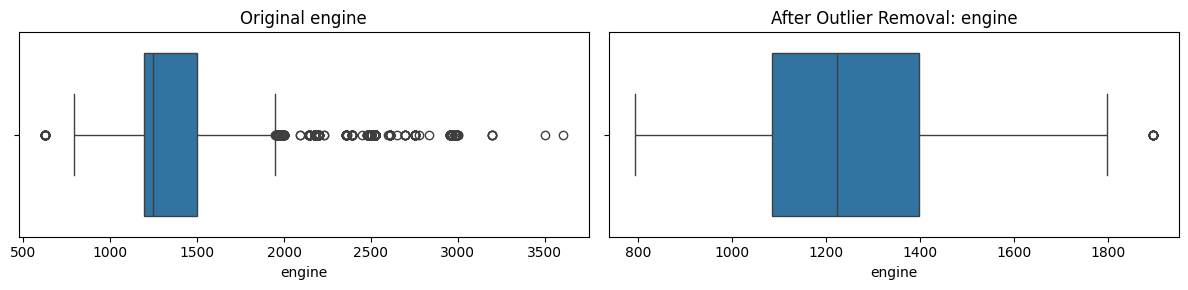

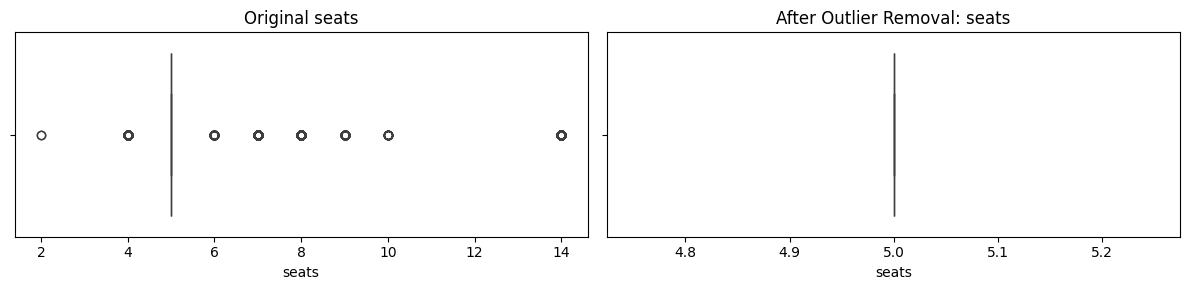

In [93]:
# Comparision of the original and the replaced values in the data set before and after IQR
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize original vs cleaned for a column
for col in columns_with_outliers:
    fig, axes = plt.subplots(1, 2, figsize=(12, 3))

    sns.boxplot(data=df, x=col, ax=axes[0])
    axes[0].set_title(f"Original {col}")

    sns.boxplot(data=df_cleaned, x=col, ax=axes[1])
    axes[1].set_title(f"After Outlier Removal: {col}")

    plt.tight_layout()
    plt.show()


                                      Data Visualization

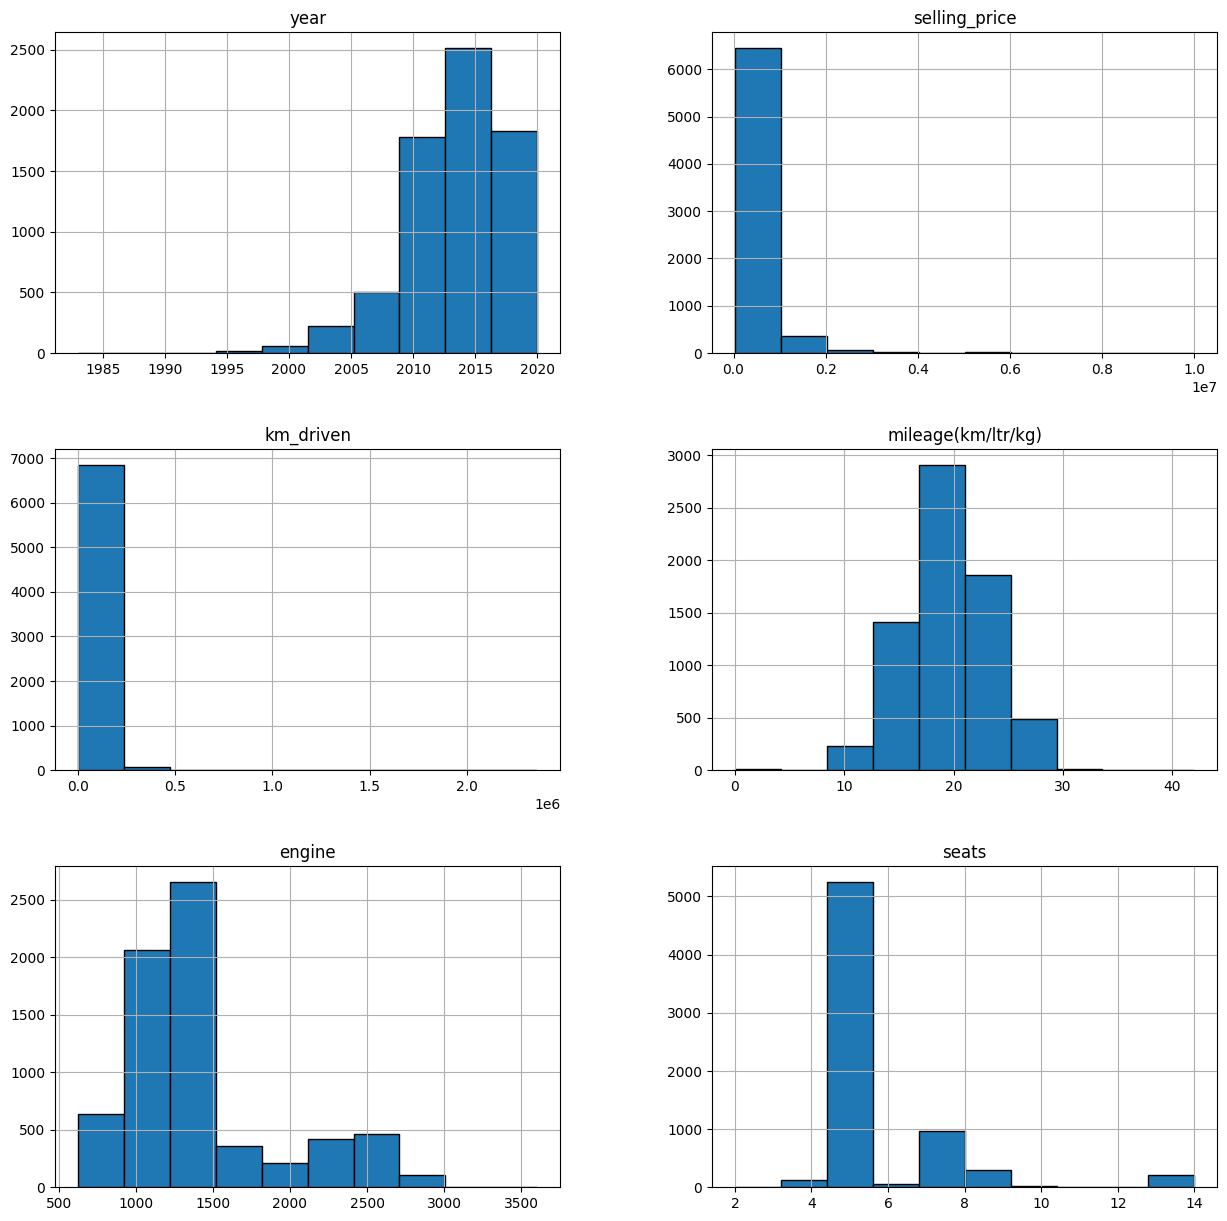

In [94]:
# plotting the histogram of the numerical variables in the data set
df.hist(figsize=(15,15),edgecolor='black');

<Axes: xlabel='engine', ylabel='Count'>

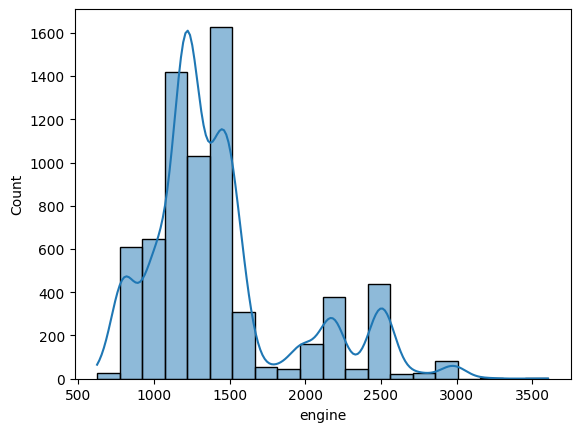

In [95]:
# plot of the engine values and its count
sns.histplot(df['engine'], kde=True, bins=20)


<Axes: xlabel='km_driven', ylabel='Count'>

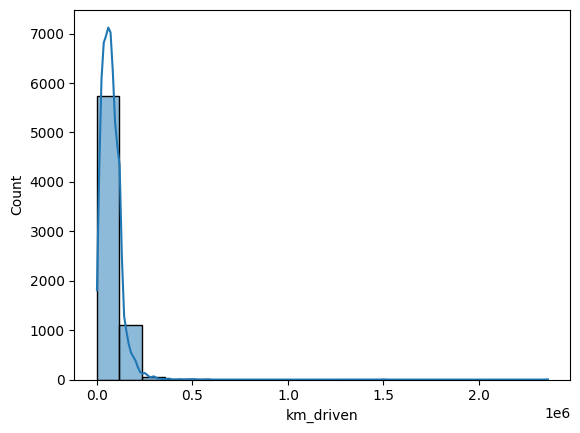

In [96]:
#plot of the the number of cars avaiable in the data with their kms-driven
sns.histplot(df['km_driven'], kde=True, bins=20)


<Axes: xlabel='max_power', ylabel='Count'>

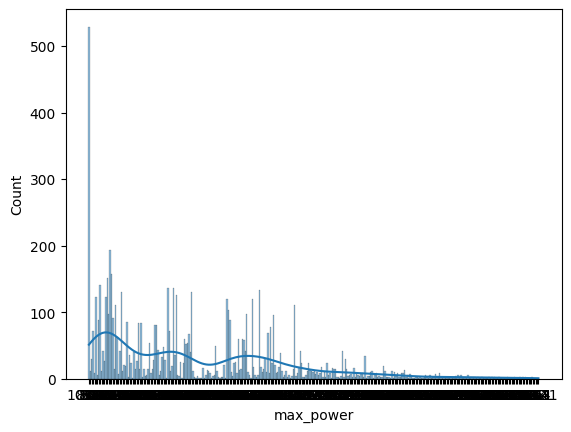

In [97]:
#plot of the macx_power and their counts
sns.histplot(df['max_power'], kde=True, bins=20)


<Axes: xlabel='year', ylabel='Count'>

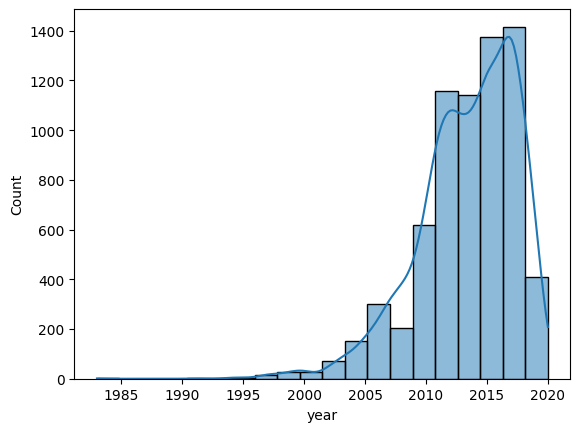

In [98]:
# plot of the year the number by count
sns.histplot(df['year'], kde=True, bins=20)


<Axes: xlabel='mileage(km/ltr/kg)', ylabel='Count'>

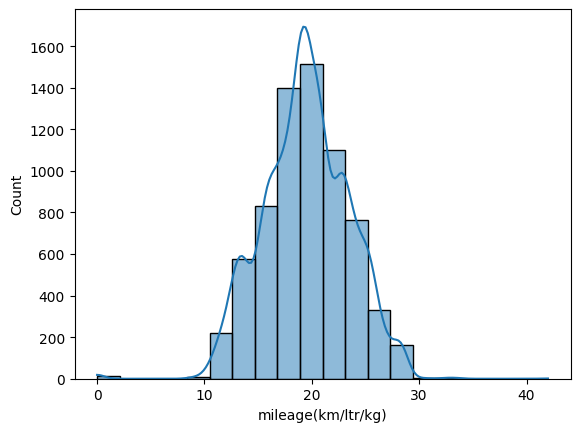

In [99]:
sns.histplot(df['mileage(km/ltr/kg)'], kde=True, bins=20)


<Axes: xlabel='year', ylabel='count'>

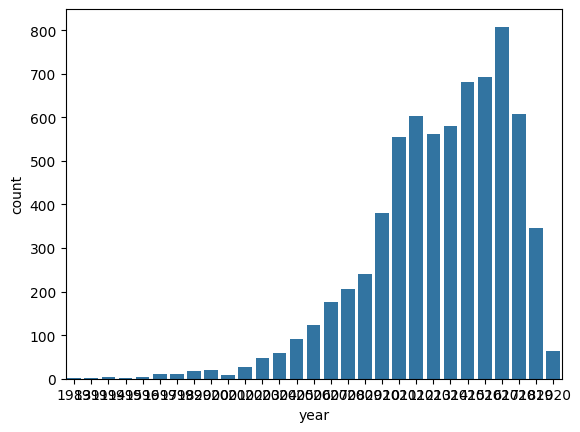

In [100]:
sns.countplot(x='year',data=df,)

/tmp/ipython-input-101-4213391325.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels = x, fontsize=12, rotation=50)


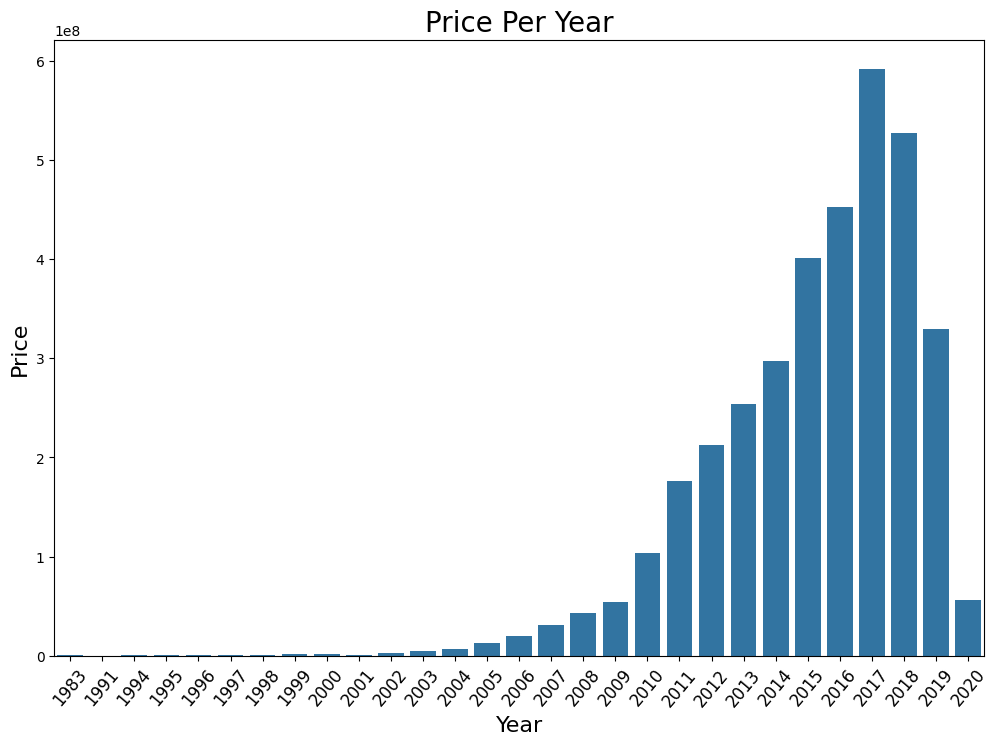

In [101]:
y = df.groupby(['year']).sum()
y = y['selling_price']
x = y.index.astype(int)

plt.figure(figsize=(12,8))
ax = sns.barplot(y = y, x = x)
ax.set_xlabel(xlabel='Year', fontsize=16)
ax.set_xticklabels(labels = x, fontsize=12, rotation=50)
ax.set_ylabel(ylabel='Price', fontsize=16)
ax.set_title(label='Price Per Year', fontsize=20)
plt.show();

**Insights Gained from EDA and Their Impact on Future Modeling**

During the exploratory data analysis (EDA) process, I have observed several things from the  dataset:

*Data Quality and Missing Values*

I have identified missing values in critical columns such as mileage, engine, and max_power. These missing values need to be handled carefully, either by imputation or removal, to prevent bias or errors in the model.

*Outliers and Data Distribution*

Outliers were detected in numeric features such as selling_price, year, and km_driven. These extreme values may skew the model’s learning and predictions. Applying outlier treatment techniques like IQR filtering or transformations will improve model robustness.


*Feature Relationships and Correlations*

Strong correlations were observed between features such as engine and max_power, while some features showed low correlation with the target variable (selling_price). This insight will help in feature selection, potentially reducing dimensionality by dropping irrelevant or redundant variables.

*Data Imbalance*

Certain categories (e.g., vehicle ownership types) were imbalanced, which may influence model bias. Addressing class imbalance through resampling or weighting may be necessary, especially for classification tasks.



**How These Insights Will Guide Future Modeling Steps**

*Data Cleaning*: We will impute or remove missing values thoughtfully, ensuring minimal loss of information and avoiding bias.



*Outlier Treatment:* Before modeling, we will apply techniques to handle outliers such as winsorization or transformations to stabilize variance.



*Feature Engineering and Encoding:* Categorical features will be encoded properly to allow models to interpret them. We may also create interaction terms or polynomial features if needed.



*Feature Selection:* Based on correlation and importance analysis, we will select the most relevant features to improve model performance and reduce overfitting.



*Model Choice and Evaluation:* The understanding of data distribution and imbalance will guide our choice of algorithms and evaluation metrics, such as considering tree-based models that handle non-linear relationships and metrics that address class imbalanc